In [1]:
# project: p9
# submitter: ccmaloney
# partner: jmaloney3
# hours: 5

In [2]:

import csv
import copy 
import matplotlib
import pandas

# Allows you to render matplotlib graphs in the same notebook
%matplotlib inline 

def plot_dict(d, label="Number of Movies"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)


In [3]:
#p8-functions

def unique(l):
    return list(set(l))

def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

def get_mapping(path):
    csv_data = process_csv(path) # you can use this function from p7
    return dict(csv_data)
    # TODO: make a dictionary where keys are the ID's and values are the names


def format_movie_data(data):
    data['year'] = int(data['year'])
    data['genres'] = data['genres'].split(", ")
    data['duration'] = int(data['duration'])
    data['actors'] = data['actors'].split(", ")
    data['directors'] = data['directors'].split(", ")
    data['rating'] = float(data['rating'])
    return data

def get_raw_movies(path):
    movie_data = process_csv(path)
    header = movie_data[0]
    body = movie_data[1:]
    return list(map(lambda x: format_movie_data(dict(zip(header, x))), body))

def get_movies(movies_path, mapping_path):
    mapping = get_mapping(mapping_path)
    raw = get_raw_movies(movies_path)
    
    def replace_mapped_values(movie):
        movie['title'] = mapping[movie['title']]
        movie['directors'] = list(map(lambda d: mapping[d], movie['directors']))
        movie['actors'] = list(map(lambda a: mapping[a], movie['actors']))
        return movie
    
    return list(map(lambda x: replace_mapped_values(x), raw))

movies_data = get_movies("movies.csv", "mapping.csv")

def search_bar(movies, keyword):
    '''given a list of movie dictionaries and a keyword, 
    returns a list of movies that contains the keyword'''
    idx = 0
    while idx < len(movies):
        movie = movies[idx]
        if (keyword not in movie['title']) and (keyword not in movie["genres"]) and  (keyword not in movie["directors"]) and (keyword not in movie["actors"]):
            movies.pop(idx)
        else:
            idx += 1
    return movies

def search_bar_sliced(movies, keyword):
    return search_bar(movies[:], keyword)

def mean(l, key = lambda x: x):
    return sum(map(key, l)) / len(l)

def median(l, key = lambda x: x):
    s = sorted(l, key = key)
    length = len(l)
    if length % 2 == 0:
        return mean(s[(length // 2) - 1 : (length // 2) + 1])
    else:
        return s[(length // 2)]
    
def reduce(f, i, initial = None):
    if initial == None:
        try:
            rv = next(i)
        except StopIteration:
            print("Out")
            return None
    else:
        rv = initial
    
    for j in i:
        rv = f(rv, j)
    return rv

def bucketize_reduce(d, row, key, value):
    k = key(row)
    if type(k) == list:
        for i in k:
            bucketize_reduce(d, (i, value(row)), lambda x: x[0], lambda x: x[1])
    else:
        if not k in d:
            d[k] = []
        d[k].append(value(row))
    return d

def bucketize(l, key = lambda x: x[0], value = lambda x: x[1]):
    return reduce(lambda d, row: bucketize_reduce(d, row, key, value), l, initial = {})  

In [4]:
#Q1: What is the average rating of the 'Lord of the Rings' trilogy, which was directed by 'Peter Jackson'?
LOTR = search_bar_sliced(movies_data, 'Lord of the Rings')
LOTRPJ = search_bar_sliced(LOTR, 'Peter Jackson')
mean(list(map(lambda x: x['rating'] , LOTRPJ)))

8.8

In [5]:
#Q2: What is the median rating of all 'Mission: Impossible' movies?
MI = search_bar_sliced(movies_data, 'Mission: Impossible')
list(map(lambda x: x['rating'] , MI))
median(list(map(lambda x: x['rating'] , MI)))

7.25

In [6]:
#Q3: Find all the movies with least rating.
minrating = min(list(map(lambda x: x['rating'] , movies_data)))
list(filter(lambda x: x['rating'] == minrating, movies_data))

[{'title': 'Proud American',
  'year': 2008,
  'genres': ['Drama'],
  'duration': 115,
  'directors': ['Fred Ashman'],
  'actors': ['Michael G. Davis',
   'Cecelia Antoinette',
   'Marie Antoinette',
   'Michelle Ashman'],
  'rating': 1.1},
 {'title': 'Troy: The Resurrection of Aeneas',
  'year': 2018,
  'genres': ['Animation', 'Action', 'Adventure'],
  'duration': 60,
  'directors': ['Aeneas Middleton'],
  'actors': ['Aeneas Middleton', 'Hardley Davidson'],
  'rating': 1.1},
 {'title': 'Browncoats: Independence War',
  'year': 2015,
  'genres': ['Action', 'Sci-Fi', 'War'],
  'duration': 98,
  'directors': ['Francis Hamada'],
  'actors': ['Beth Bemis',
   'Richard Martinsen',
   'Will James Johnson',
   'Nathan Cosmo Rahn'],
  'rating': 1.1},
 {'title': 'The Time Machine (I Found at a Yardsale)',
  'year': 2011,
  'genres': ['Sci-Fi'],
  'duration': 84,
  'directors': ['Steven A. Sandt'],
  'actors': ['George Abdelmalak', 'Steven Ronald Brattman', 'Elise Caloca'],
  'rating': 1.1},
 {'

In [7]:
#Q4: Find the highest rated 'Toy Story' movies.
TS=search_bar_sliced(movies_data, 'Toy Story')
HRTS = max(list(map(lambda x: x['rating'], TS)))
list(filter(lambda x: x['rating'] == HRTS, TS))

[{'title': 'Toy Story 3',
  'year': 2010,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 103,
  'directors': ['Lee Unkrich'],
  'actors': ['Tom Hanks', 'Tim Allen'],
  'rating': 8.3},
 {'title': 'Toy Story',
  'year': 1995,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 81,
  'directors': ['John Lasseter'],
  'actors': ['Tom Hanks', 'Tim Allen', 'Don Rickles'],
  'rating': 8.3}]

In [8]:
#Q5: Find the list of movies 'Chadwick Boseman' acted in.


actor_buckets = bucketize(movies_data, lambda x: x['actors'], lambda x: x)

actor_buckets['Chadwick Boseman']


[{'title': 'Message from the King',
  'year': 2016,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 102,
  'directors': ['Fabrice du Welz'],
  'actors': ['Chadwick Boseman', 'Luke Evans'],
  'rating': 6.4},
 {'title': 'Black Panther',
  'year': 2018,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'duration': 134,
  'directors': ['Ryan Coogler'],
  'actors': ['Chadwick Boseman', 'Michael B. Jordan', "Lupita Nyong'o"],
  'rating': 7.3},
 {'title': 'Get on Up',
  'year': 2014,
  'genres': ['Biography', 'Drama', 'Music'],
  'duration': 139,
  'directors': ['Tate Taylor'],
  'actors': ['Chadwick Boseman', 'Nelsan Ellis', 'Dan Aykroyd'],
  'rating': 6.9},
 {'title': '21 Bridges',
  'year': 2019,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 99,
  'directors': ['Brian Kirk'],
  'actors': ['Chadwick Boseman', 'Sienna Miller', 'J.K. Simmons'],
  'rating': 6.6},
 {'title': '42',
  'year': 2013,
  'genres': ['Biography', 'Drama', 'Sport'],
  'duration': 128,
  'directors': ['B

In [9]:
#Q6: Find the list of movies 'Emma Stone' acted in
actor_buckets['Emma Stone']

[{'title': 'The Croods',
  'year': 2013,
  'genres': ['Animation', 'Action', 'Adventure'],
  'duration': 98,
  'directors': ['Kirk DeMicco', 'Chris Sanders'],
  'actors': ['Nicolas Cage', 'Emma Stone'],
  'rating': 7.2},
 {'title': 'Marmaduke',
  'year': 2010,
  'genres': ['Comedy', 'Family'],
  'duration': 99,
  'directors': ['Tom Dey'],
  'actors': ['Owen Wilson',
   'Emma Stone',
   'George Lopez',
   'Christopher Mintz-Plasse'],
  'rating': 4.3},
 {'title': 'The Help',
  'year': 2011,
  'genres': ['Drama'],
  'duration': 146,
  'directors': ['Tate Taylor'],
  'actors': ['Emma Stone', 'Viola Davis', 'Bryce Dallas Howard'],
  'rating': 8.0},
 {'title': 'Easy A',
  'year': 2010,
  'genres': ['Comedy', 'Drama', 'Romance'],
  'duration': 92,
  'directors': ['Will Gluck'],
  'actors': ['Emma Stone', 'Penn Badgley', 'Amanda Bynes', 'Dan Byrd'],
  'rating': 7.0},
 {'title': 'Irrational Man',
  'year': 2015,
  'genres': ['Comedy', 'Drama', 'Romance'],
  'duration': 95,
  'directors': ['Wood

In [10]:
#Q7: Find the number of movies in each genre.
genre_buckets = bucketize(movies_data, lambda x: x['genres'], lambda x: x)
num_mov_in_genre = dict(map(lambda x: (x[0], len(x[1])) , genre_buckets.items()))
num_mov_in_genre

{'Action': 5611,
 'Horror': 5175,
 'Sci-Fi': 2148,
 'Crime': 5078,
 'Thriller': 5340,
 'Comedy': 11130,
 'Drama': 16410,
 'Romance': 5753,
 'History': 627,
 'Adventure': 3849,
 'Western': 1177,
 'Family': 1585,
 'Fantasy': 1537,
 'War': 779,
 'Sport': 565,
 'Biography': 1009,
 'Mystery': 2479,
 'Film-Noir': 647,
 'Music': 908,
 'Animation': 676,
 'Musical': 941,
 'Reality-TV': 1,
 'Documentary': 1,
 'News': 1}

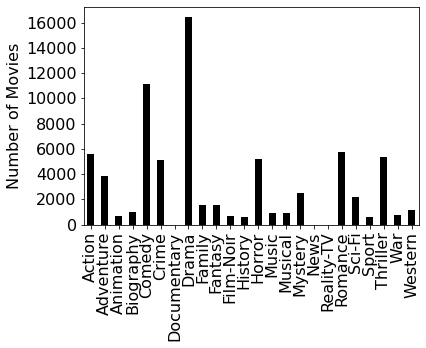

In [11]:
#Q8: Plot the number of movies in each genre as a bar graph.
plot_dict(num_mov_in_genre)


In [12]:
#Q9: Find the number of movies released in each decade.
year_buckets = bucketize(movies_data, lambda x: x['year'], lambda x: x)


num_mov_in_year = dict(map(lambda x: (x[0], len(x[1])) , year_buckets.items()))
decades = bucketize(num_mov_in_year.items(), lambda x: (x[0] - 1) // 10, lambda x: x[1])
decades_dict = dict(map(lambda x: (str((x[0] * 10) + 1) + " to " + str((x[0] + 1) * 10), sum(x[1])), decades.items()))
decades_dict


{'1981 to 1990': 2840,
 '2011 to 2020': 8884,
 '2001 to 2010': 6271,
 '1941 to 1950': 2256,
 '1971 to 1980': 1889,
 '1951 to 1960': 2201,
 '1931 to 1940': 2256,
 '1961 to 1970': 1609,
 '1991 to 2000': 4280,
 '1911 to 1920': 120,
 '1921 to 1930': 496}

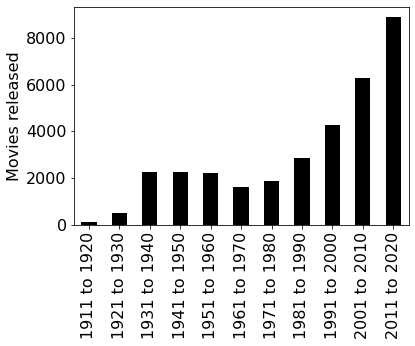

In [13]:
#Q10: Plot the number of movies released in each decade as a bar graph.
plot_dict(decades_dict, "Movies released")

In [14]:
#Q11: Find the highest rated movies for each genre.


def highest_rated_inbucket(bucket):
    w_rating = map(lambda x: (x[0], x[1], max(map(lambda z: z['rating'], x[1]))), bucket.items())
    return dict(map(lambda x: (x[0], list(filter(lambda y: y['rating'] == x[2], x[1]))), w_rating))

highest_rated_inbucket(genre_buckets)

  

{'Action': [{'title': 'The Dark Knight',
   'year': 2008,
   'genres': ['Action', 'Crime', 'Drama'],
   'duration': 152,
   'directors': ['Christopher Nolan'],
   'actors': ['Christian Bale',
    'Heath Ledger',
    'Aaron Eckhart',
    'Michael Caine'],
   'rating': 9.0}],
 'Horror': [{'title': 'Psycho',
   'year': 1960,
   'genres': ['Horror', 'Mystery', 'Thriller'],
   'duration': 109,
   'directors': ['Alfred Hitchcock'],
   'actors': ['Anthony Perkins', 'Vera Miles', 'John Gavin'],
   'rating': 8.5}],
 'Sci-Fi': [{'title': 'Inception',
   'year': 2010,
   'genres': ['Action', 'Adventure', 'Sci-Fi'],
   'duration': 148,
   'directors': ['Christopher Nolan'],
   'actors': ['Leonardo DiCaprio',
    'Joseph Gordon-Levitt',
    'Ellen Page',
    'Tom Hardy'],
   'rating': 8.8}],
 'Crime': [{'title': 'The Godfather',
   'year': 1972,
   'genres': ['Crime', 'Drama'],
   'duration': 175,
   'directors': ['Francis Ford Coppola'],
   'actors': ['Marlon Brando', 'Al Pacino'],
   'rating': 9.

In [15]:
#Q12: Find the median rating of movies from each genre.
median_ratings = dict(
    map(lambda x: (x[0], median(
        list(
            map(lambda z: z['rating'], x[1])))), genre_buckets.items()))

median_ratings

{'Action': 5.5,
 'Horror': 4.6,
 'Sci-Fi': 4.9,
 'Crime': 6.0,
 'Thriller': 5.1,
 'Comedy': 5.9,
 'Drama': 6.1,
 'Romance': 6.2,
 'History': 6.5,
 'Adventure': 6.0,
 'Western': 6.2,
 'Family': 5.9,
 'Fantasy': 5.7,
 'War': 6.4,
 'Sport': 6.1,
 'Biography': 6.7,
 'Mystery': 5.8,
 'Film-Noir': 6.6,
 'Music': 6.2,
 'Animation': 6.4,
 'Musical': 6.2,
 'Reality-TV': 2.1,
 'Documentary': 7.5,
 'News': 6.4}

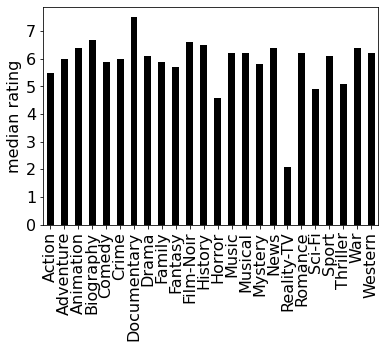

In [16]:
#Q13: Plot the median of movies in each genre as a bar graph.
plot_dict(median_ratings, 'median rating')

In [17]:
#Q14: Sort the list of genres in decreasing order of their median rating.
list(map(lambda x: x[0], sorted(median_ratings.items(), key = lambda x: x[1], reverse = True)))

['Documentary',
 'Biography',
 'Film-Noir',
 'History',
 'War',
 'Animation',
 'News',
 'Romance',
 'Western',
 'Music',
 'Musical',
 'Drama',
 'Sport',
 'Crime',
 'Adventure',
 'Comedy',
 'Family',
 'Mystery',
 'Fantasy',
 'Action',
 'Thriller',
 'Sci-Fi',
 'Horror',
 'Reality-TV']

In [18]:
#Q15: Sort all 'Star Wars' movies in increasing order of their year of release.
star_wars = search_bar_sliced(movies_data, 'Star Wars')
sorted(star_wars, key = lambda x: x['year'])


[{'title': 'Star Wars',
  'year': 1977,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 121,
  'directors': ['George Lucas'],
  'actors': ['Mark Hamill', 'Harrison Ford', 'Carrie Fisher'],
  'rating': 8.6},
 {'title': 'Star Wars: Episode V - The Empire Strikes Back',
  'year': 1980,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 124,
  'directors': ['Irvin Kershner'],
  'actors': ['Mark Hamill', 'Harrison Ford'],
  'rating': 8.7},
 {'title': 'Star Wars: Episode VI - Return of the Jedi',
  'year': 1983,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 131,
  'directors': ['Richard Marquand'],
  'actors': ['Mark Hamill',
   'Harrison Ford',
   'Carrie Fisher',
   'Billy Dee Williams',
   'Anthony Daniels'],
  'rating': 8.3},
 {'title': 'Star Wars: Episode I - The Phantom Menace',
  'year': 1999,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 136,
  'directors': ['George Lucas'],
  'actors': ['Liam Neeson', 'Ewan McGregor', 'Natalie

In [19]:
#Q16: Find a list of all movies that are both acted and directed by 'Clint Eastwood'.
Clint_Eastwood = search_bar_sliced(movies_data, 'Clint Eastwood')
both_by_clint = list(filter(lambda x: 'Clint Eastwood' in x['actors'] and 'Clint Eastwood' in x['directors'], Clint_Eastwood))
both_by_clint

[{'title': 'Space Cowboys',
  'year': 2000,
  'genres': ['Action', 'Adventure', 'Thriller'],
  'duration': 130,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood',
   'Tommy Lee Jones',
   'Donald Sutherland',
   'James Garner',
   'James Cromwell'],
  'rating': 6.4},
 {'title': 'Heartbreak Ridge',
  'year': 1986,
  'genres': ['Drama', 'War'],
  'duration': 130,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood', 'Marsha Mason', 'Everett McGill', 'Moses Gunn'],
  'rating': 6.9},
 {'title': 'Firefox',
  'year': 1982,
  'genres': ['Action', 'Adventure', 'Thriller'],
  'duration': 136,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood', 'Freddie Jones', 'David Huffman'],
  'rating': 6.0},
 {'title': 'The Rookie',
  'year': 1990,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 120,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood', 'Charlie Sheen'],
  'rating': 5.9},
 {'title': 'Pale Rider',
  'year': 1985,
  'genres': ['Dram

In [20]:
#Q17: Sort the titles of the movies that are both acted and directed by 'Clint Eastwood'.
list(map(lambda x: x['title'], sorted(both_by_clint, key = lambda x: x['duration'])))

['Play Misty for Me',
 'High Plains Drifter',
 'The Gauntlet',
 'Blood Work',
 'White Hunter Black Heart',
 'Pale Rider',
 'Gran Torino',
 'The Mule',
 'Bronco Billy',
 'Sudden Impact',
 'The Rookie',
 'Absolute Power',
 'Honkytonk Man',
 'True Crime',
 'The Eiger Sanction',
 'Space Cowboys',
 'Heartbreak Ridge',
 'Unforgiven',
 'Million Dollar Baby',
 'The Bridges of Madison County',
 'The Outlaw Josey Wales',
 'Firefox',
 'A Perfect World']

In [21]:
#Q18: Sort the titles of the movies that are directed by both 'Anthony Russo' and 'Joe Russo' in increasing order of their durations.
dir_by_russos = search_bar_sliced(movies_data, 'Joe Russo') + search_bar_sliced(movies_data, 'Anthony Russo')
dir_by_russos = list(filter(lambda x: 'Joe Russo' and 'Anthony Russo' in x['directors'], dir_by_russos))
dir_by_russos = unique(map(lambda x: (x['title'],x['duration']), dir_by_russos))
list(map(lambda x: x[0], sorted(dir_by_russos, key = lambda x: x[1])))


['Welcome to Collinwood',
 'You, Me and Dupree',
 'Captain America: The Winter Soldier',
 'Captain America: Civil War',
 'Avengers: Infinity War',
 'Avengers: Endgame']

In [22]:
#Q19: Find the titles of the 15 shortest Biographies in the dataset.
bios = search_bar_sliced(movies_data, 'Biography')
bios = filter(lambda x: 'Biography' in x['genres'], bios)
list(map(lambda x: x[0], (sorted(map(lambda x: (x['title'], x['duration']), bios), key = lambda x: x[1])[:15])))
                                                                        

['Hibakusha',
 'King Candy',
 'Amy Winehouse: Fallen Star',
 'Steve Jobs: Visionary Genius',
 'The Road to Hollywood',
 'Danny Greene: The Rise and Fall of the Irishman',
 'From the Manger to the Cross; or, Jesus of Nazareth',
 'Joseph Smith: Prophet of the Restoration',
 'The Trade',
 'Blondes at Work',
 'Spirit of Youth',
 'The Loves of Edgar Allan Poe',
 'Alexander Hamilton',
 'Dillinger',
 'Memoria']

In [23]:
#Q20: Find the top 25 actors with the highest median rating among those actors who have acted in at least 15 movies.
acted_in_15 = list(filter(lambda x: len(x[1]) >= 15, actor_buckets.items()))
acted_in_15 = map(lambda x: (x[0], median(list(map(lambda y: y['rating'], x[1])))), acted_in_15)
acted_in_15 = sorted(acted_in_15, key = lambda x: x[1], reverse = True)
list(map(lambda x: x[0], acted_in_15))[:25]




['Audrey Hepburn',
 'Leonardo DiCaprio',
 'Woody Allen',
 'Ryan Gosling',
 'Harold Lloyd',
 'Brad Pitt',
 'Philip Seymour Hoffman',
 'Ralph Fiennes',
 'Laurence Olivier',
 'Groucho Marx',
 'Humphrey Bogart',
 'Amy Adams',
 'Jake Gyllenhaal',
 'Judy Garland',
 'Bette Davis',
 'Albert Brooks',
 'Bill Murray',
 'Russell Crowe',
 'Christian Bale',
 'Buster Keaton',
 'Tom Cruise',
 'Fred Astaire',
 'Chris Cooper',
 'Matt Damon',
 'Donald Crisp']